In [20]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
all_fights = pd.read_csv('Data Sets/Merged_Fights_Fighters.csv')
all_fights.drop(['Unnamed: 0'], axis=1, inplace=True)
#mask to remove contested fights
mask_no_contest_1 = ((all_fights.method != 'No Contest - Hoffman Failed Drug Test') & 
                   (all_fights.method != 'No Contest - Overturned by State Commission') &
                    (all_fights.method != 'No') & (all_fights.method != "NC") & 
                    (all_fights.method != 'No Contest - Caceres Failed Drug Test') & 
                     (all_fights.method != 'No Contest - Overturned by Commission' ) & 
                     (all_fights.method !='No Contest') & (all_fights.method != 'Draw'))
# df_contested fights
fights = all_fights[mask_no_contest_1]

In [21]:
#Making copies of the data frame for different models

dq_only = fights
ko_only = fights
tko_only = fights
jd_only = fights
sub_only = fights

In [3]:
# #Updating method_encoder
# def meth_encoder(y):
#     method_code = []
#     for method in fights['method']:
#         if method == y:
#             x = 1
#         else:
#             x = 0
#     method_code.append(x)
#     return method_code

In [22]:
dq_only['method_code'] = dq_only['method'].map(lambda x: 1 if x == 'DQ' else 0)
dq_only['method_code'].sum()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


11

In [23]:
formula_dq = 'method_code ~ C(event_place) + C(ref) + match_time + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) - 1'
dq_Y,dq_X = patsy.dmatrices(formula_dq, data=dq_only, return_type = "dataframe")
dq_y = np.ravel(dq_Y)
print dq_X.shape
print dq_y.shape
print dq_y

(3510, 5299)
(3510,)
[ 0.  0.  0. ...,  0.  0.  0.]


In [ ]:
#dq_X_train, dq_X_test, dq_y_train, dq_y_test = train_test_split(dq_X, dq_y, test_size=0.33)

In [24]:
ko_only['method_code'] = ko_only['method'].map(lambda x: 1 if x == 'KO' else 0)
ko_only['method_code'].sum()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


414

In [25]:
formula_ko = 'method_code ~ C(event_place) + C(ref) + match_time + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) - 1'
ko_Y,ko_X = patsy.dmatrices(formula_ko, data=ko_only, return_type = "dataframe")
ko_y = np.ravel(ko_Y)
print ko_X.shape
print ko_y.shape
print ko_y

(3510, 5299)
(3510,)
[ 0.  0.  0. ...,  0.  0.  0.]


In [ ]:
#ko_X_train, ko_X_test, ko_y_train, ko_y_test = train_test_split(ko_X, ko_y, test_size=0.33)

In [26]:
tko_only['method_code'] = tko_only['method'].map(lambda x: 1 if x == 'TKO' else 0)
tko_only['method_code'].sum()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


847

In [27]:
formula_tko = 'method_code ~ C(event_place) + C(ref) + match_time + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) - 1'
tko_Y,tko_X = patsy.dmatrices(formula_tko, data=tko_only, return_type = "dataframe")
tko_y = np.ravel(tko_Y)
print tko_X.shape
print tko_y.shape
print tko_y

(3510, 5299)
(3510,)
[ 0.  0.  0. ...,  0.  1.  0.]


In [ ]:
#tko_X_train, tko_X_test, tko_y_train, tko_y_test = train_test_split(tko_X, tko_y, test_size=0.33)

In [28]:
sub_only['method_code'] = sub_only['method'].map(lambda x: 1 if x == 'Submission' else 0)
sub_only['method_code'].sum()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


768

In [29]:
formula_sub = 'method_code ~ C(event_place) + C(ref) + match_time + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) - 1'
sub_Y,sub_X = patsy.dmatrices(formula_sub, data=sub_only, return_type = "dataframe")
sub_y = np.ravel(sub_Y)
print sub_X.shape
print sub_y.shape
print sub_y

(3510, 5299)
(3510,)
[ 1.  1.  1. ...,  0.  0.  0.]


In [ ]:
#sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(sub_X, sub_y, test_size=0.33)

In [30]:
jd_only['method_code'] = jd_only['method'].map(lambda x: 1 if x == 'Decision' else 0)
jd_only['method_code'].sum()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1470

In [31]:
formula_jd = 'method_code ~ C(event_place) + C(ref) + match_time + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) - 1'
jd_Y,jd_X = patsy.dmatrices(formula_jd, data=jd_only, return_type = "dataframe")
jd_y = np.ravel(jd_Y)
print jd_X.shape
print jd_y.shape
print jd_y

(3510, 5299)
(3510,)
[ 0.  0.  0. ...,  1.  0.  1.]


In [12]:
#jd_X_train, jd_X_test, jd_y_train, jd_y_test = train_test_split(jd_X, jd_y, test_size=0.33)

In [32]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
from sklearn.metrics import classification_report

In [41]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Cs = 1.0/np.logspace(-1,4,20)

search_parameters_lr = {
    'penalty': ['l1','l2'],
    'C': Cs,
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear'],
    'n_jobs': [4]
    }

lr_est = GridSearchCV(lr, search_parameters_lr, cv=5, scoring='average_precision')

In [42]:
dq_lr_grid = lr_est.fit(dq_X, dq_y)
print dq_lr_grid.best_params_
print dq_lr_grid.best_score_

{'penalty': 'l1', 'C': 0.0001, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': 'balanced'}
0.302119549109


In [43]:
print dq_lr_grid.score(dq_X, dq_y)
dq_y_pred_lr = dq_lr_grid.predict(dq_X)
print classification_report(dq_y, dq_y_pred_lr)

0.00420462268419
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00      3499
        1.0       0.00      1.00      0.01        11

avg / total       0.00      0.00      0.00      3510



/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:418: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)
/Users/mikesanders/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
ko_lr_grid = lr_est.fit(ko_X, ko_y)
print ko_lr_grid.best_params_
print ko_lr_grid.best_score_

{'penalty': 'l1', 'C': 0.0001, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': 'balanced'}
0.558974358974


In [45]:
print ko_lr_grid.score(ko_X, ko_y)
ko_y_pred_lr = ko_lr_grid.predict(ko_X)
print classification_report(ko_y, ko_y_pred_lr)

0.558974358974
             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94      3096
        1.0       0.00      0.00      0.00       414

avg / total       0.78      0.88      0.83      3510



In [46]:
tko_lr_grid = lr_est.fit(tko_X, tko_y)
print tko_lr_grid.best_params_
print tko_lr_grid.best_score_

{'penalty': 'l1', 'C': 0.0001, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': 'balanced'}
0.552875292931


In [47]:
print tko_lr_grid.score(tko_X, tko_y)
tko_y_pred_lr = tko_lr_grid.predict(tko_X)
print classification_report(tko_y, tko_y_pred_lr)

0.324264199487
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00      2663
        1.0       0.24      1.00      0.39       847

avg / total       0.06      0.24      0.09      3510



In [64]:
sub_lr_grid.predict_proba(sub_X)

array([[  9.99993034e-01,   6.96591406e-06],
       [  9.99990030e-01,   9.96952769e-06],
       [  9.99997040e-01,   2.96028652e-06],
       ..., 
       [  8.39713790e-02,   9.16028621e-01],
       [  1.47905615e-01,   8.52094385e-01],
       [  1.01791271e-01,   8.98208729e-01]])

In [48]:
sub_lr_grid = lr_est.fit(sub_X, sub_y)
print dq_lr_grid.best_params_
print dq_lr_grid.best_score_

{'penalty': 'l1', 'C': 0.00018329807108324373, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': 'balanced'}
0.609401709402


In [49]:
print sub_lr_grid.score(sub_X, sub_y)
sub_y_pred_lr = sub_lr_grid.predict(sub_X)
print classification_report(sub_y, sub_y_pred_lr)

0.609401709402
             precision    recall  f1-score   support

        0.0       0.78      1.00      0.88      2742
        1.0       0.00      0.00      0.00       768

avg / total       0.61      0.78      0.69      3510



In [50]:
jd_lr_grid = lr_est.fit(jd_X, jd_y)
print jd_lr_grid.best_params_
print jd_lr_grid.best_score_

{'penalty': 'l2', 'C': 0.042813323987193959, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': 'balanced'}
0.930987385223


In [51]:
print jd_lr_grid.score(jd_X, jd_y)
jd_y_pred_lr = jd_lr_grid.predict(jd_X)
print classification_report(jd_y, jd_y_pred_lr)

0.937582594618
             precision    recall  f1-score   support

        0.0       0.99      0.92      0.96      2040
        1.0       0.90      0.99      0.94      1470

avg / total       0.96      0.95      0.95      3510



In [67]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Cs = 1.0/np.logspace(-1,4,20)

search_parameters_lr = {
    'penalty': ['l1','l2'],
    'C': Cs,
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear'],
    'n_jobs': [4]
    }

lr_est = GridSearchCV(lr, search_parameters_lr, cv=5)

In [69]:
dq_lr_grid = lr_est.fit(dq_X, dq_y)
print dq_lr_grid.best_params_
print dq_lr_grid.best_score_
print dq_lr_grid.score(dq_X, dq_y)
dq_y_pred_lr = dq_lr_grid.predict(dq_X)
dq_y_proba_lr = dq_lr_grid.predict_proba(dq_X)
print classification_report(dq_y, dq_y_pred_lr)

{'penalty': 'l1', 'C': 0.023357214690901237, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': None}
0.996866096866
0.996866096866
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      3499
        1.0       0.00      0.00      0.00        11

avg / total       0.99      1.00      1.00      3510



In [70]:
ko_lr_grid = lr_est.fit(ko_X, ko_y)
print ko_lr_grid.best_params_
print ko_lr_grid.best_score_
print ko_lr_grid.score(ko_X, ko_y)
ko_y_pred_lr = ko_lr_grid.predict(ko_X)
ko_y_proba_lr = ko_lr_grid.predict_proba(ko_X)
print classification_report(ko_y, ko_y_pred_lr)

{'penalty': 'l1', 'C': 0.0037926901907322499, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': None}
0.882051282051
0.882051282051
             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94      3096
        1.0       0.00      0.00      0.00       414

avg / total       0.78      0.88      0.83      3510



In [71]:
tko_lr_grid = lr_est.fit(tko_X, tko_y)
print tko_lr_grid.best_params_
print tko_lr_grid.best_score_
print tko_lr_grid.score(tko_X, tko_y)
tko_y_pred_lr = tko_lr_grid.predict(tko_X)
tko_y_proba_lr = tko_lr_grid.predict_proba(tko_X)
print classification_report(tko_y, tko_y_pred_lr)

{'penalty': 'l1', 'C': 0.00061584821106602664, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': None}
0.758689458689
0.758689458689
             precision    recall  f1-score   support

        0.0       0.76      1.00      0.86      2663
        1.0       0.00      0.00      0.00       847

avg / total       0.58      0.76      0.65      3510



In [72]:
sub_lr_grid = lr_est.fit(sub_X, sub_y)
print dq_lr_grid.best_params_
print dq_lr_grid.best_score_
print sub_lr_grid.score(sub_X, sub_y)
sub_y_pred_lr = sub_lr_grid.predict(sub_X)
sub_y_proba_lr = sub_lr_grid.predict_proba(sub_X)
print classification_report(sub_y, sub_y_pred_lr)

{'penalty': 'l1', 'C': 0.0020691380811147901, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': None}
0.781196581197
0.781196581197
             precision    recall  f1-score   support

        0.0       0.78      1.00      0.88      2742
        1.0       0.00      0.00      0.00       768

avg / total       0.61      0.78      0.69      3510



In [73]:
jd_lr_grid = lr_est.fit(jd_X, jd_y)
print jd_lr_grid.best_params_
print jd_lr_grid.best_score_
print jd_lr_grid.score(jd_X, jd_y)
jd_y_pred_lr = jd_lr_grid.predict(jd_X)
jd_y_proba_lr = jd_lr_grid.predict_proba(jd_X)
print classification_report(jd_y, jd_y_pred_lr)

{'penalty': 'l1', 'C': 0.14384498882876628, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': None}
0.952421652422
0.954131054131
             precision    recall  f1-score   support

        0.0       0.99      0.93      0.96      2040
        1.0       0.91      0.99      0.95      1470

avg / total       0.96      0.95      0.95      3510



In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [91]:
def plot_roc_curve(X_test, y_test, title, grid):
    Y_score = grid.decision_function(X_test)

    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # For class 1, find the area under the curve
    FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
    ROC_AUC[1] = auc(FPR[1], TPR[1])
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)




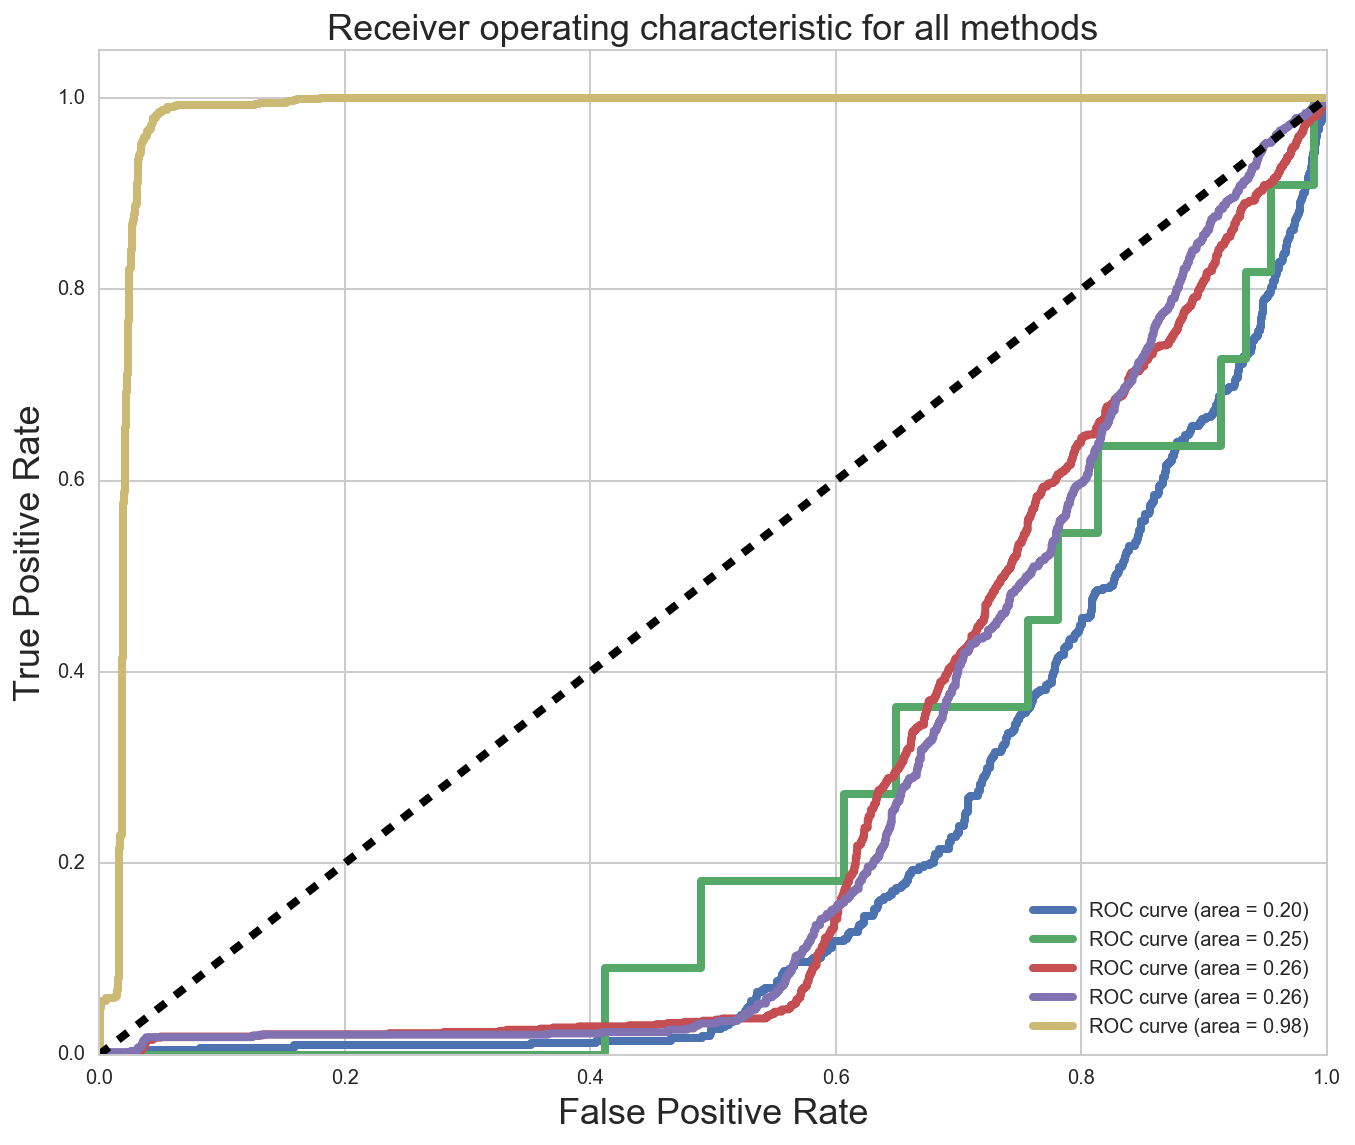

In [93]:


# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plot_roc_curve(ko_X, ko_y, 'KOs', ko_lr_grid)
plot_roc_curve(dq_X, dq_y, 'DQs', dq_lr_grid)
plot_roc_curve(tko_X, tko_y, 'TKOs', tko_lr_grid)
plot_roc_curve(sub_X, sub_y, 'Submissions', sub_lr_grid)
plot_roc_curve(jd_X, jd_y, 'Decisions', jd_lr_grid)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for all methods', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [52]:
search_parameters_knn = {
    
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto'],
    'leaf_size': [5, 10, 20, 30, 45],
    'n_neighbors': [1, 2, 3, 4, 5],
    'n_jobs': [4],
    'p': [2],
    'metric': ['minkowski']
    }

knn_est = GridSearchCV(knn, search_parameters_knn, cv=10, scoring='average_precision')

In [53]:
dq_knn_grid = knn_est.fit(dq_X, dq_y)
print dq_knn_grid.best_params_
print dq_knn_grid.best_score_

{'n_neighbors': 1, 'n_jobs': 4, 'algorithm': 'auto', 'metric': 'minkowski', 'p': 2, 'weights': 'uniform', 'leaf_size': 5}
0.151424501425


In [54]:
print dq_lr_grid.score(dq_X, dq_y)
dq_y_pred_lr = dq_lr_grid.predict(dq_X)
print classification_report(dq_y, dq_y_pred_lr)

0.00188506722063
             precision    recall  f1-score   support

        0.0       0.99      0.54      0.70      3499
        1.0       0.00      0.09      0.00        11

avg / total       0.99      0.54      0.70      3510



In [55]:
ko_knn_grid = knn_est.fit(ko_X, ko_y)
print ko_knn_grid.best_params_
print ko_knn_grid.best_score_

{'n_neighbors': 1, 'n_jobs': 4, 'algorithm': 'auto', 'metric': 'minkowski', 'p': 2, 'weights': 'uniform', 'leaf_size': 5}
0.32029663647


In [56]:
print ko_lr_grid.score(ko_X, ko_y)
ko_y_pred_lr = ko_lr_grid.predict(ko_X)
print classification_report(ko_y, ko_y_pred_lr)

0.0700380348469
             precision    recall  f1-score   support

        0.0       0.79      0.48      0.60      3096
        1.0       0.01      0.03      0.01       414

avg / total       0.70      0.43      0.53      3510



In [57]:
tko_knn_grid = knn_est.fit(tko_X, tko_y)
print tko_knn_grid.best_params_
print tko_knn_grid.best_score_

{'n_neighbors': 1, 'n_jobs': 4, 'algorithm': 'auto', 'metric': 'minkowski', 'p': 2, 'weights': 'uniform', 'leaf_size': 10}
0.455969912504


In [58]:
print tko_lr_grid.score(tko_X, tko_y)
tko_y_pred_lr = tko_lr_grid.predict(tko_X)
print classification_report(tko_y, tko_y_pred_lr)

0.160264415647
             precision    recall  f1-score   support

        0.0       0.59      0.42      0.49      2663
        1.0       0.05      0.09      0.06       847

avg / total       0.46      0.34      0.39      3510



In [59]:
sub_knn_grid = knn_est.fit(sub_X, sub_y)
print sub_knn_grid.best_params_
print sub_knn_grid.best_score_

{'n_neighbors': 1, 'n_jobs': 4, 'algorithm': 'auto', 'metric': 'minkowski', 'p': 2, 'weights': 'uniform', 'leaf_size': 5}
0.460097998923


In [63]:
print sub_knn_grid.score(sub_X, sub_y)
sub_y_pred_lr = sub_lr_grid.predict(sub_X)
print classification_report(sub_y, sub_y_pred_lr)

0.109401709402
             precision    recall  f1-score   support

        0.0       0.63      0.44      0.52      2742
        1.0       0.04      0.09      0.06       768

avg / total       0.50      0.36      0.42      3510



In [61]:
jd_knn_grid = knn_est.fit(jd_X, jd_y)
print jd_knn_grid.best_params_
print jd_knn_grid.best_score_

{'n_neighbors': 5, 'n_jobs': 4, 'algorithm': 'auto', 'metric': 'minkowski', 'p': 2, 'weights': 'distance', 'leaf_size': 5}
0.948977203029


In [62]:
print jd_lr_grid.score(jd_X, jd_y)
jd_y_pred_lr = jd_lr_grid.predict(jd_X)
print classification_report(jd_y, jd_y_pred_lr)

0.937582594618
             precision    recall  f1-score   support

        0.0       0.99      0.92      0.96      2040
        1.0       0.90      0.99      0.94      1470

avg / total       0.96      0.95      0.95      3510



In [ ]:

FP_log, TP_log, thresholds_log = roc_curve(Y_test, Y_pred_logreg)
roc_auc_log = auc(FP_log, TP_log)

FP_knn, TP_knn, thresholds_knn = roc_curve(Y_test, Y_pred_knn)
roc_auc_knn = auc(FP_knn, TP_knn)

FP_dtc, TP_dtc, thresholds_dtc = roc_curve(Y_test, Y_pred_dtc)
roc_auc_dtc = auc(FP_dtc, TP_dtc)

fig = plt.figure(figsize=(10,10))
plt.title('ROC Curve\n', fontsize =20)
plt.plot(FP_log, TP_log, 'y', label='Log AUC = %0.2f'% roc_auc_log)
plt.plot(FP_knn, TP_knn, 'g', label='kNN AUC = %0.2f'% roc_auc_knn)
plt.plot(FP_dtc, TP_dtc, 'b', label='Decision Tree AUC = %0.2f'% roc_auc_dtc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()